In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kolkata Knight Riders') & (df2['team2'] == 'Royal Challengers Bangalore')]
match2 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Kolkata Knight Riders')]

Match1 = Kolkata Home Ground

Match2 = Bangalore Home Ground

# Overall Kolkata vs Bangalore:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                  team1  \
26    27    2017    Kolkata  2017-04-23  Kolkata Knight Riders   
59    60    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
87    88    2008    Kolkata  2008-05-08  Kolkata Knight Riders   
133  134    2009     Durban  2009-04-29  Kolkata Knight Riders   
155  156    2009  Centurion  2009-05-12  Kolkata Knight Riders   

                           team2                  toss_winner toss_decision  \
26   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
59   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
87   Royal Challengers Bangalore        Kolkata Knight Riders           bat   
133  Royal Challengers Bangalore        Kolkata Knight Riders           bat   
155  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied                       winner  win_by_runs  \
26   normal           0        Kolkata Knight Riders           82   
59   normal           0        Kolkata Knight Riders          140   
87   normal           0        Kolkata Knight Riders            5   
133  normal           0  Royal Challengers Bangalore            0   
155  normal           0  Royal Challengers Bangalore            0   

     win_by_wickets  player_of_match                  venue      umpire1  \
26                0  NM Coulter-Nile           Eden Gardens  CB Gaffaney   
59                0      BB McCullum  M Chinnaswamy Stadium    Asad Rauf   
87                0       SC Ganguly           Eden Gardens    Asad Rauf   
133               5       MV Boucher              Kingsmead    MR Benson   
155               6      LRPL Taylor        SuperSport Park    M Erasmus   

            umpire2 umpire3  
26        CK Nandan     NaN  
59      RE Koertzen     NaN  
87        IL Howell     NaN  
133  TH Wijewardene     NaN  
155       SS Hazare     NaN

Matches played between Kolkata and Bangalore.

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

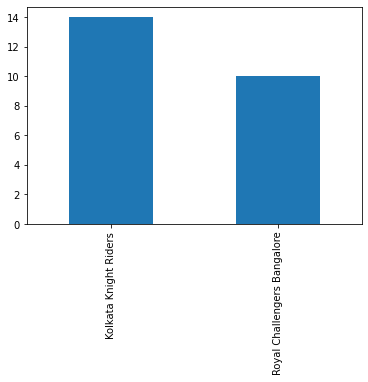

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Kolkata won 14 times and Bangalore won 10 times against each other.

In [9]:
match['toss_winner'].value_counts()

Royal Challengers Bangalore    13
Kolkata Knight Riders          11
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    21
bat       3
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kolkata Knight Riders          9
Royal Challengers Bangalore    8
Name: winner, dtype: int64

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Kolkata won the toss and won the match 9 times and Bangalore 8 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning           batting_team                 bowling_team  \
6254        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6255        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6256        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6257        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6258        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   

      over  ball    batsman non_striker    bowler  is_super_over  ...  \
6254     1     1  SP Narine   G Gambhir  S Badree              0  ...   
6255     1     2  SP Narine   G Gambhir  S Badree              0  ...   
6256     1     3  SP Narine   G Gambhir  S Badree              0  ...   
6257     1     4  SP Narine   G Gambhir  S Badree              0  ...   
6258     1     5  SP Narine   G Gambhir  S Badree              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
6254         0            0            0             0             0   
6255         0            0            0             0             4   
6256         0            0            0             0             4   
6257         0            0            0             0             4   
6258         0            0            0             0             6   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
6254           0           0               NaN            NaN     NaN  
6255           0           4               NaN            NaN     NaN  
6256           0           4               NaN            NaN     NaN  
6257           0           4               NaN            NaN     NaN  
6258           0           6               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Kolkata and Bangalore.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## RCB lost wickets between 31st ball to 120th ball:

In [15]:
total_wickets_Bangalore = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 6)]['player_dismissed'].count()
total_wickets_Bangalore

100

Bangalore lost 100 wickets in between 31st ball to 120th ball against Kolkata.

In [16]:
avg_wickets_Bangalore = math.ceil(total_wickets_Bangalore/len(ids))
avg_wickets_Bangalore

5

Bangalore lost 5 wickets in an avearge per match in between 31st ball to 120th ball against Kolkata.

In [17]:
total_wickets_batting_first = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 6) & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_batting_first

38

Bangalore lost 38 wickets in between 31st ball to 120th ball against Kolkata while batting first.

In [18]:
total_matches_batting_first_Bangalore = len(delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Bangalore

8

Total innings of Bangalore batting first against Kolkata.

In [19]:
avg_wickets_Bangalore_batting_first = (total_wickets_batting_first/total_matches_batting_first_Bangalore)
avg_wickets_Bangalore_batting_first

4.75

Bangalore lost 5 wickets in an avearge per match in between 31st ball to 120th ball against Kolkata while batting first.

In [20]:
total_wickets_batting_second = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 6) & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second

62

Bangalore lost 62 wickets in between 31st ball to 120th ball against Kolkata while batting second.

In [21]:
total_matches_batting_second_Bangalore = len(delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Bangalore

16

Total innings of Bangalore batting second against Kolkata.

In [22]:
avg_wickets_Bangalore_batting_second = (total_wickets_batting_second/total_matches_batting_second_Bangalore)
avg_wickets_Bangalore_batting_second

3.875

Bangalore lost 4 wickets in an avearge per match in between 31st ball to 120th ball against Kolkata while batting second.

In [23]:
total_wickets_Bangalore_overall = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] >= 6)]['player_dismissed'].count()
total_wickets_Bangalore_overall

810

Bangalore lost 810 wickets in between 31st ball to 120th ball overall in IPL.

In [24]:
Bangalore_matches = df2[(df2['team1'] == 'Royal Challengers Bangalore') | (df2['team2'] == 'Royal Challengers Bangalore')]
total_ids_Bangalore = list(Bangalore_matches['id'])
avg_wickets_Bangalore_overall = (total_wickets_Bangalore_overall/len(total_ids_Bangalore))
avg_wickets_Bangalore_overall

4.5

Bangalore lost 5 wickets in an avearge per match in between 31st ball to 120th ball overall.

In [25]:
average_wickets = pd.Series([avg_wickets_Bangalore,avg_wickets_Bangalore_overall],index = ['Against Kolkata','Overall'])
sns.barplot(x = average_wickets.index , y = average_wickets)
plt.title('Average wickets lost by Bangalore in between 31st ball to 120th ball')
plt.show()

1. Bangalore lost 5 wickets in an average per match overall and against Kolkata.
2. Bangalore lost 4 wickets in an average against Kolkata while batting second

## How many balls will AB De Villiers take to score 30 runs:

In [26]:
ball_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'AB de Villiers')]['batsman_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'AB de Villiers')]['wide_runs'])
    s = 0
    l = []
    wide = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        if s >= 30:
            break
    if s > 30:
        total_balls = len(l) - wide
    if total_balls > 0:
        ball_list.append(total_balls)
ball_taken_ABD_for_30 = ball_list
print(ball_taken_ABD_for_30)

[22, 12, 22]


AB de Villiers scored more than 30 against Kolkata only 3 times and he took these number of balls.

In [27]:
avg_balls_taken_ABD = math.ceil(np.mean(ball_taken_ABD_for_30))
avg_balls_taken_ABD

19

AB de Villiers took 19 balls in an average against Kolkata to score 30.

In [28]:
total_ids1 = list(df1[df1['batsman'] == 'AB de Villiers']['match_id'].unique())
ball_list = []
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers')]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers')]['wide_runs'])
    s = 0
    l = []
    wide = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        if s >= 30:
            break
    if s > 30:
        total_balls = len(l) - wide
    if total_balls > 0:
        ball_list.append(total_balls)
ball_taken_ABD_for_30_overall = ball_list
print(ball_taken_ABD_for_30_overall)

[27, 24, 26, 26, 13, 21, 12, 17, 22, 7, 16, 17, 19, 24, 16, 20, 7, 25, 20, 15, 17, 26, 23, 22, 12, 14, 16, 20, 18, 25, 22, 23, 27]


AB de Villiers scored more than 30 in IPL overall and he took these number of balls.

In [29]:
avg_balls_taken_ABD_overall = math.ceil(np.mean(ball_taken_ABD_for_30_overall))
avg_balls_taken_ABD_overall

20

AB de Villiers took 20 balls in an average in IPL to score 30.

In [30]:
total_ids1 = list(df1[df1['batsman'] == 'AB de Villiers']['match_id'].unique())
ball_list = []
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers') & (df1['inning'] == 1)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers') & (df1['inning'] == 1)]['wide_runs'])
    s = 0
    l = []
    wide = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        if s >= 30:
            break
    if s > 30:
        total_balls = len(l) - wide
    if total_balls > 0:
        ball_list.append(total_balls)
ball_taken_ABD_for_30_overall_batting_first = ball_list
print(ball_taken_ABD_for_30_overall_batting_first)

[27, 26, 17, 7, 16, 17, 24, 16, 20, 25, 20, 15, 17, 23, 12, 16, 18, 22, 27]


AB de Villiers scored more than 30 in IPL overall and he took these number of balls while batting first.

In [31]:
avg_balls_taken_ABD_overall_batting_first = math.ceil(np.mean(ball_taken_ABD_for_30_overall_batting_first))
avg_balls_taken_ABD_overall_batting_first

20

AB de Villiers took 20 balls in an average in IPL to score 30 whie batting first.

In [32]:
total_ids1 = list(df1[df1['batsman'] == 'AB de Villiers']['match_id'].unique())
ball_list = []
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers') & (df1['inning'] == 2)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'AB de Villiers') & (df1['inning'] == 2)]['wide_runs'])
    s = 0
    l = []
    wide = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        if s >= 30:
            break
    if s > 30:
        total_balls = len(l) - wide
    if total_balls > 0:
        ball_list.append(total_balls)
ball_taken_ABD_for_30_overall_batting_second = ball_list
print(ball_taken_ABD_for_30_overall_batting_second)

[24, 26, 13, 21, 12, 22, 19, 7, 26, 22, 14, 20, 25, 23]


AB de Villiers scored more than 30 in IPL overall and he took these number of balls while batting second.

In [33]:
avg_balls_taken_ABD_overall_batting_second = math.ceil(np.mean(ball_taken_ABD_for_30_overall_batting_second))
avg_balls_taken_ABD_overall_batting_second

20

AB de Villiers took 20 balls in an average in IPL to score 30 whie batting second.

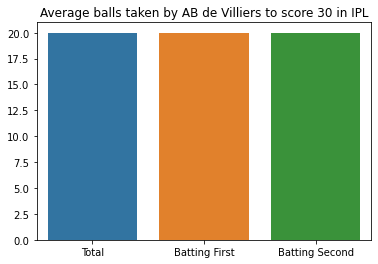

In [34]:
average_balls_taken_ABD_for_30 = pd.Series([avg_balls_taken_ABD_overall,avg_balls_taken_ABD_overall_batting_first,avg_balls_taken_ABD_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_balls_taken_ABD_for_30.index , y = average_balls_taken_ABD_for_30)
plt.title('Average balls taken by AB de Villiers to score 30 in IPL')
plt.show()

AB de Villiers took 20 balls in an average to score 30 runs while batting first or second.

## Difference of Eoin Morgan's overall strike rate and last 7 balls strike rate:

In [35]:
strike_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'EJG Morgan')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls >= 7:
        strike_rate = np.round((total_runs/total_balls)*100,2)
        last_7_balls_runs = np.sum(runs[-7:])
        strike_rate1 = np.round((last_7_balls_runs/7)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list.append(np.round(np.abs(strike_rate-strike_rate1),2))
print(strike_rate_list)

[0.0]


Morgan faced 7 balls once against RCB earlier. So the difference of strike rate becomes zero. Morgan joined Kolkata this year again. So we don't have this year's data.

In [36]:
strike_rate_list_overall = []
total_ids2 = list(df1[df1['batsman'] == 'EJG Morgan']['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'EJG Morgan')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls >= 7:
        strike_rate = np.round((total_runs/total_balls)*100,2)
        last_7_balls_runs = np.sum(runs[-7:])
        strike_rate1 = np.round((last_7_balls_runs/7)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall.append(np.round(np.abs(strike_rate-strike_rate1),2))
print(strike_rate_list_overall)

[47.14, 47.9, 19.05, 0.0, 21.43, 26.19, 0.96, 49.21, 69.78, 8.93, 1.79, 40.66, 18.46, 6.22, 0.0, 104.57, 30.15, 70.86, 31.75, 7.14, 0.0, 0.0, 47.14, 95.77, 11.69, 90.0, 30.86, 0.0, 0.0, 68.57, 22.22, 95.69, 8.33, 75.0, 17.14]


Eoin Morgan's overall strike rate differences in IPL. The values zero means he played exact 7 balls. and non zero values are ball faced by Morgan is greater than zero.

In [37]:
s = 0
counter = 0
for i in strike_rate_list_overall:
    if i > 0:
        counter +=1
        s += i
avg_strike_rate_overall = math.ceil(s/counter)
avg_strike_rate_overall

41

Eoin Morgan's strike rate difference is 41 in an average per match in overall IPL.

In [38]:
strike_rate_list_overall_batting_first = []
total_ids2 = list(df1[df1['batsman'] == 'EJG Morgan']['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'EJG Morgan') & (df1['inning'] == 1)]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls >= 7:
        strike_rate = np.round((total_runs/total_balls)*100,2)
        last_7_balls_runs = np.sum(runs[-7:])
        strike_rate1 = np.round((last_7_balls_runs/7)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_first.append(np.round(np.abs(strike_rate-strike_rate1),2))
print(strike_rate_list_overall_batting_first)

[0.0, 49.21, 18.46, 0.0, 104.57, 31.75, 0.0, 0.0, 47.14, 95.77, 90.0, 30.86, 0.0, 0.0, 68.57, 95.69, 17.14]


Eoin Morgan's overall strike rate differences in IPL while batting first. The values zero means he played exact 7 balls. and non zero values are ball faced by Morgan is greater than zero.

In [39]:
s = 0
counter = 0
for i in strike_rate_list_overall_batting_first:
    if i > 0:
        counter +=1
        s += i
avg_strike_rate_overall_batting_first = math.ceil(s/counter)
avg_strike_rate_overall_batting_first

60

Eoin Morgan's strike rate difference is 60 in an average per match in overall IPL while batting first.

In [40]:
strike_rate_list_overall_batting_second = []
total_ids2 = list(df1[df1['batsman'] == 'EJG Morgan']['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'EJG Morgan') & (df1['inning'] == 2)]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls >= 7:
        strike_rate = np.round((total_runs/total_balls)*100,2)
        last_7_balls_runs = np.sum(runs[-7:])
        strike_rate1 = np.round((last_7_balls_runs/7)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_second.append(np.round(np.abs(strike_rate-strike_rate1),2))
print(strike_rate_list_overall_batting_second)

[47.14, 47.9, 19.05, 21.43, 26.19, 0.96, 69.78, 8.93, 1.79, 40.66, 6.22, 30.15, 70.86, 7.14, 11.69, 22.22, 8.33, 75.0]


Eoin Morgan's overall strike rate differences in IPL while batting second. The values zero means he played exact 7 balls. and non zero values are ball faced by Morgan is greater than zero.

In [41]:
s = 0
counter = 0
for i in strike_rate_list_overall_batting_second:
    if i > 0:
        counter +=1
        s += i
avg_strike_rate_overall_batting_second = math.ceil(s/counter)
avg_strike_rate_overall_batting_second

29

Eoin Morgan's strike rate difference is 29 in an average per match in overall IPL while batting second.

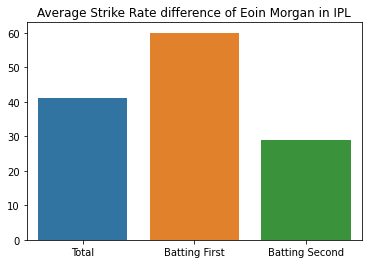

In [42]:
average_strike_rate = pd.Series([avg_strike_rate_overall,avg_strike_rate_overall_batting_first,avg_strike_rate_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate.index , y = average_strike_rate)
plt.title('Average Strike Rate difference of Eoin Morgan in IPL')
plt.show()

So Eoin Morgan's strike rate difference is better when he batted in the first inning.

## Bangalore score in death overs:

In [43]:
total_runs_Bangalore = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 16)]['total_runs'].sum()
total_runs_Bangalore

999

Bangalore scored 999 runs in death overs against Kolkata.

In [44]:
avg_runs_Bangalore = math.ceil(total_runs_Bangalore/len(ids))
avg_runs_Bangalore

42

Bangalore scored 42 runs in an average per match in death overs against Kolkata.

In [45]:
total_runs_Bangalore_batting_first = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 16) & (delivery['inning'] == 1)]['total_runs'].sum()
total_runs_Bangalore_batting_first

477

Bangalore scored 477 runs in death overs against Kolkata while batting first.

In [46]:
avg_runs_Bangalore_batting_first = math.ceil(total_runs_Bangalore_batting_first/total_matches_batting_first_Bangalore)
avg_runs_Bangalore_batting_first

60

Bangalore scored 60 runs in an average per match in death overs against Kolkata while batting first.

In [47]:
total_runs_Bangalore_batting_second = delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] >= 16) & (delivery['inning'] == 2)]['total_runs'].sum()
total_runs_Bangalore_batting_second

522

Bangalore scored 522 runs in death overs against Kolkata while batting second.

In [48]:
avg_runs_Bangalore_batting_second = math.ceil(total_runs_Bangalore_batting_second/total_matches_batting_second_Bangalore)
avg_runs_Bangalore_batting_second

33

Bangalore scored 33 runs in an average per match in death overs against Kolkata while batting second.

In [49]:
average_runs_Bangalore = pd.Series([avg_runs_Bangalore,avg_runs_Bangalore_batting_first,avg_runs_Bangalore_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_runs_Bangalore.index , y = average_runs_Bangalore)
plt.title('Average Runs by Bangalore in death overs against Kolkata')
plt.show()

Bangalore scored more runs in an average per match against Kolkata while batting first.

In [50]:
total_runs_Bangalore_overall = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] >= 16)]['total_runs'].sum()
total_runs_Bangalore_overall

7881

Bangalore scored 7881 runs in death overs in IPL.

In [51]:
avg_runs_Bangalore_overall = math.ceil(total_runs_Bangalore_overall/len(total_ids1))
avg_runs_Bangalore_overall

56

Bangalore scored 56 runs in an average per match in death overs in IPL.

In [52]:
total_runs_Bangalore_overall_batting_first = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] >= 16) & (df1['inning'] == 1)]['total_runs'].sum()
total_runs_Bangalore_overall_batting_first

4470

Bangalore scored 4470 runs in death overs in IPL while batting first.

In [53]:
total_matches_batting_first_Bangalore_overall = len(df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Bangalore_overall

85

Total matches when Bangalore batted in first inning.

In [54]:
avg_runs_Bangalore_overall_batting_first = math.ceil(total_runs_Bangalore_overall_batting_first/total_matches_batting_first_Bangalore_overall)
avg_runs_Bangalore_overall_batting_first

53

Bangalore scored 53 runs in an average per match in death overs in IPL while batting first.

In [55]:
total_runs_Bangalore_overall_batting_second = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] >= 16) & (df1['inning'] == 2)]['total_runs'].sum()
total_runs_Bangalore_overall_batting_second

3411

Bangalore scored 3411 runs in death overs in IPL while batting second.

In [56]:
total_matches_batting_second_Bangalore_overall = len(df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Bangalore_overall

95

Total matches when Bangalore batted in second inning.

In [57]:
avg_runs_Bangalore_overall_batting_second = math.ceil(total_runs_Bangalore_overall_batting_second/total_matches_batting_second_Bangalore_overall)
avg_runs_Bangalore_overall_batting_second

36

Bangalore scored 36 runs in an average per match in death overs in IPL while batting second.

In [58]:
average_runs_Bangalore_overall = pd.Series([avg_runs_Bangalore_overall,avg_runs_Bangalore_overall_batting_first,avg_runs_Bangalore_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_runs_Bangalore_overall.index , y = average_runs_Bangalore_overall)
plt.title('Average Runs by Bangalore in death overs in IPL')
plt.show()

Bangalore scored more runs in an average per match in IPL while batting first.